In [78]:
# IMPORTING ALL NECESSARY LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [79]:
# READING THE DATASET USING PANDAS
data = pd.read_csv("/content/Mall_Customers.csv")

In [80]:
# CONVERTING THE DATA INTO DATAFRAME
df = pd.DataFrame(data)

In [81]:
# DISPLAYING FIRST 5 RECORDS OF THE DATAFRAME
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [82]:
# COUNT OF NO. ROWS AND COLUMNS IN THE DATASET
df.shape

(200, 5)

In [83]:
# DESCRIBING THE DATASET INFORMATION
df.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [84]:
# DISPLAYING THE DATA TYPES PRESENT IN THE DATASET
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [85]:
# CHECKING FOR NULL/MISSING VALUES
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [86]:
# GENDER DISTRIBUTION COUNT
df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [87]:
# PREPROCESSING AND SCALING THE DATA BASED ON ITS FEATURES
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

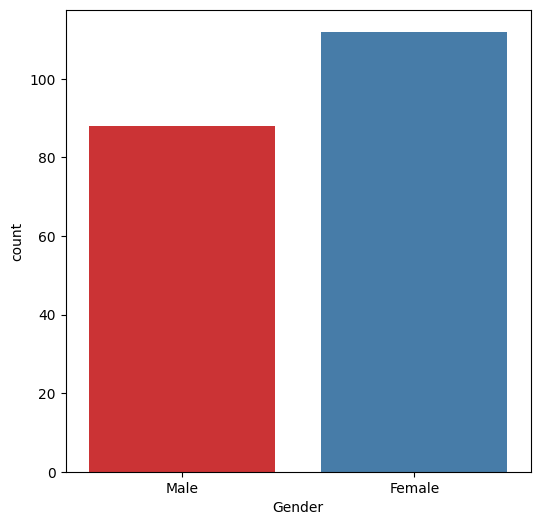

In [88]:
# SIMPLE VISUALIZATION OF GENDER DISTRIBUTION
plt.figure(1 , figsize = (6 , 6))
sns.countplot(x = 'Gender' , data = data, palette='Set1')
plt.show()

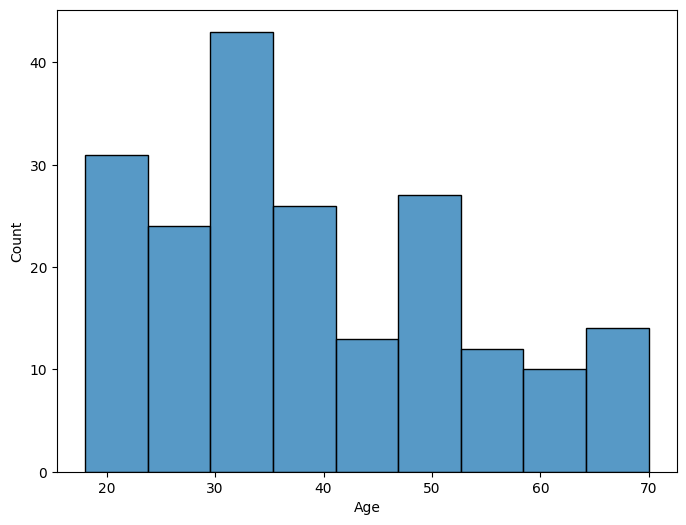

In [89]:
# HISTOGRAM OF CUSTOMER AGE AND ITS FREQUENCY
plt.figure(figsize=(8, 6))
sns.histplot(data["Age"])
plt.xlabel("Age")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

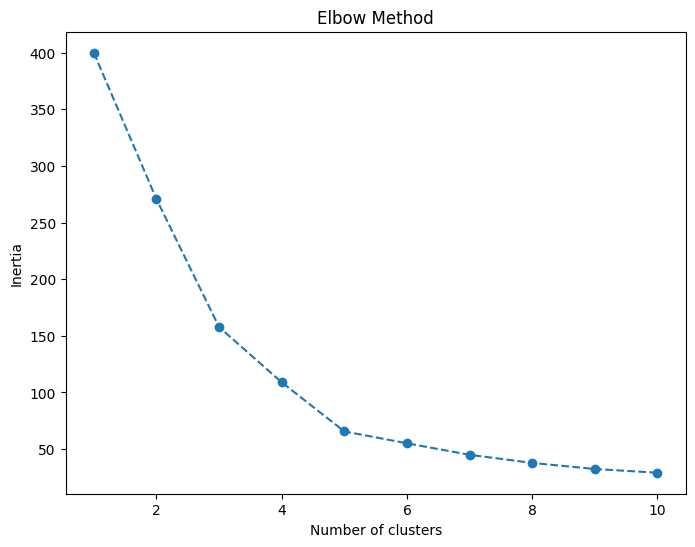

In [90]:
# USING KMEANS ALGORITHM THROUGH THE ELBOW METHOD APPROACH
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# VISUALIZING THE NUMBER OF CLUSTERS
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


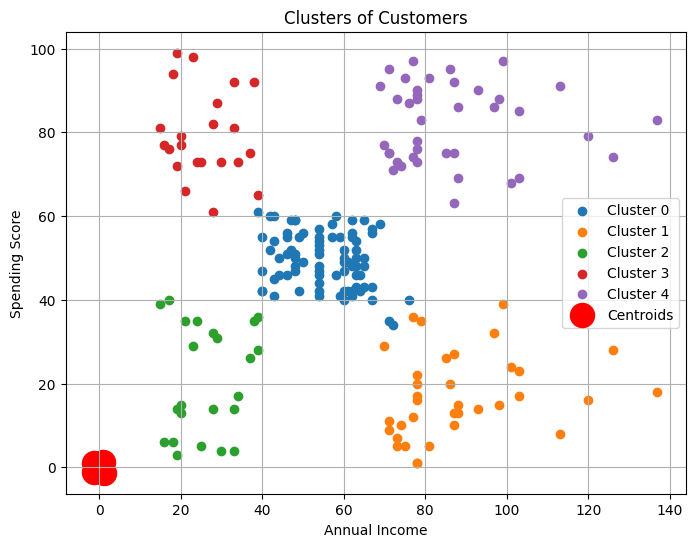

In [92]:
# SELECTING THE OPTIMAL CLUSTERS AS 5
optimal_clusters = 5

# APPLYING KMEANS ALGORITHM TO THE OPTIMAL CLUSTER VALUE
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_features)
data['Cluster'] = clusters

# VISUALIZING THE CLUSTERED POINTS
plt.figure(figsize=(8, 6))
for cluster in range(optimal_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', label='Centroids', marker='o')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()